In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! ls

drive  sample_data


In [4]:
% cd drive

/content/drive


In [5]:
% cd MyDrive/Datasets/Hamoye-rnn/prophet

/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet


In [6]:
! pwd

/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet


In [8]:
% cd Hamoye-Prophet-Team

/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet/Hamoye-Prophet-Team


In [9]:
! ls

'='	   China_Scholarship_EDA.ipynb	 Procfile	    README.md
'=1.2.0'   data				 prophet.ipynb	    requirements.txt
 app.py    model.pkl			 prophet_re.ipynb   templates


In [ ]:
! git clone https://github.com/drissdunn/Hamoye-Prophet-Team.git

Cloning into 'Hamoye-Prophet-Team'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 104 (delta 39), reused 53 (delta 14), pack-reused 0
Receiving objects: 100% (104/104), 2.05 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
% cd Hamoye-Prophet-Team/

/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet/Hamoye-Prophet-Team


In [ ]:
! ls

app.py			     model.pkl	    prophet_re.ipynb  templates
China_Scholarship_EDA.ipynb  Procfile	    README.md
data			     prophet.ipynb  requirements.txt


# HDSC2022 Capstone Project
## by Team Prophet

The dataset contains information about the scholarship programs in China as of May 2019. <br>
The data was collected through by scraping the [CUCAS website](https://www.cucas.edu.cn/china_scholarships/). <br>
The code to the web scraping program and data cleaning program can be found [here](https://github.com/mcmuralishclint/CUCAS). <br>

In [10]:
! pip install xgboost

In [11]:
! pip install optuna

In [12]:
! pip install colorama

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

plt.style.use('seaborn')
from colorama import Style, Fore, Back

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
# We are going to read the csv file using read_csv() function 
initial_data = pd.read_csv('/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet/Hamoye-Prophet-Team/data/original.csv')
initial_data

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH


To have a perfect model, we decided to add more information to the dataset.

In [15]:
pip install --upgrade xlrd

In [16]:
# We are going to read the csv file using read_excel() function 
data = pd.read_excel('/content/drive/MyDrive/Datasets/Hamoye-rnn/prophet/Hamoye-Prophet-Team/data/china_scholarship.xls')
#data is our upgraded dataset

# Exploratory Data Analysis

In [17]:
data.head()

,schol_id,University,Major,Location / District,Province / City,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Xuhui,Shanghai,Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750,MONTH,1000,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Qingdao,Shandong,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0,YEAR,0,MONTH


In [18]:
initial_data.columns

Index(['schol_id', 'University', 'Major', 'Level', 'Language',
       'Tuition Covered', 'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [19]:
data.columns

Index(['schol_id', 'University', 'Major', 'Location / District',
       'Province / City', 'Level', 'Language', 'Tuition Covered',
       'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [20]:
# We are going to rename the columns using the snake_case naming convention to improve readability
data.columns = ['school_id', 'university', 'major', 'district', 'city', 'level', 'language', 'tuition_covered', 'accomodation_covered',
'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee','start_month','start_year', 'accomodation_to_pay',
'accomodation_duration', 'expense_to_pay', 'expense_duration']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school_id               3576 non-null   int64  
 1   university              3576 non-null   object 
 2   major                   3576 non-null   object 
 3   district                3576 non-null   object 
 4   city                    3576 non-null   object 
 5   level                   3576 non-null   object 
 6   language                3576 non-null   object 
 7   tuition_covered         3453 non-null   float64
 8   accomodation_covered    3576 non-null   int64  
 9   living_expense_covered  3576 non-null   int64  
 10  tuition_fees_to_pay     3576 non-null   int64  
 11  original_tuition_fee    3453 non-null   float64
 12  start_month             3576 non-null   object 
 13  start_year              3576 non-null   int64  
 14  accomodation_to_pay     3576 non-null   

In [22]:
data.shape

(3576, 18)

In [23]:
#Summary statistics for numerical columns
data.describe()

,school_id,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_year,accomodation_to_pay,expense_to_pay
count,3576.000000,3453.000000,3576.000000,3576.000000,3576.000000,3453.000000,3576.000000,3576.000000,3576.000000
mean,1816.503076,20531.704315,0.232942,0.251119,8433.516499,28693.955980,2019.056208,1376.461969,1070.987136
std,1034.126355,12428.124918,0.422765,0.433717,9519.340675,15341.450293,0.230355,2802.526970,601.297528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000
25%,923.750000,10625.000000,0.000000,0.000000,0.000000,20000.000000,2019.000000,400.000000,1000.000000
50%,1817.500000,20000.000000,0.000000,0.000000,6000.000000,26500.000000,2019.000000,900.000000,1000.000000
75%,2711.250000,26500.000000,0.000000,1.000000,11000.000000,34000.000000,2019.000000,1200.000000,1500.000000
max,3605.000000,80000.000000,1.000000,1.000000,69000.000000,148000.000000,2020.000000,24000.000000,2700.000000


In [25]:
#Summary statistics for categorical columns
data.describe(include=[object])

,university,major,district,city,level,language,start_month,accomodation_duration,expense_duration
count,3576,3576,3576,3576,3576,3576,3576,3576,3576
unique,53,1249,40,16,4,4,5,6,1
top,Zhejiang Normal University,Computer Science and Technology,Changping,Zhejiang,Master,Chinese,Sep,MONTH,MONTH
freq,402,54,565,915,1461,2395,3551,2575,3576


In [27]:
#check for duplicate data
duplicate =data.duplicated()
print(duplicate.sum())

0


In [29]:
data.isnull().sum()

school_id                   0
university                  0
major                       0
district                    0
city                        0
level                       0
language                    0
tuition_covered           123
accomodation_covered        0
living_expense_covered      0
tuition_fees_to_pay         0
original_tuition_fee      123
start_month                 0
start_year                  0
accomodation_to_pay         0
accomodation_duration       0
expense_to_pay              0
expense_duration            0
dtype: int64

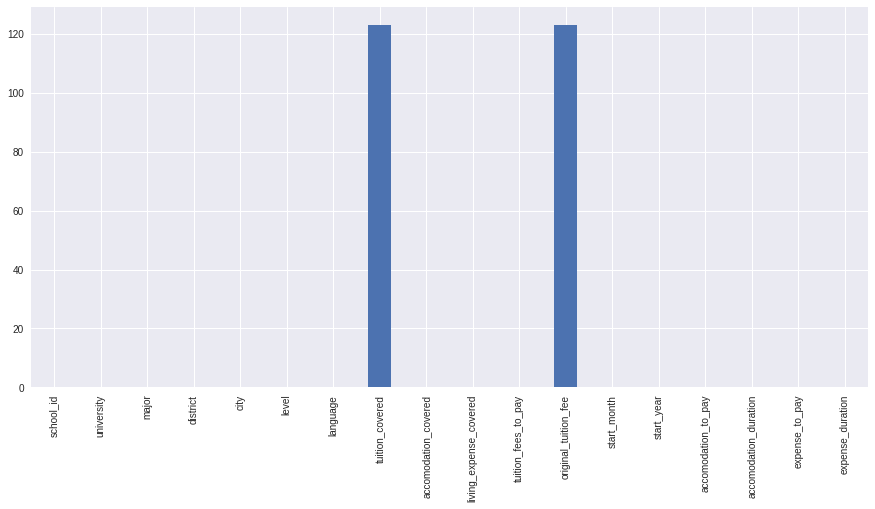

In [30]:
data.isnull().sum().plot(kind = 'bar', figsize = (15, 7))

CONCLUSION

The China Scholarship Prediction dataset contains 3576 observations and 16 columns.

The 'Tuition_Covered' and 'Original_Tuition_Fee' columns have 123 null values each.

The dataset contains object(7), float64(4), int64(5) types

There are no duplicate data.

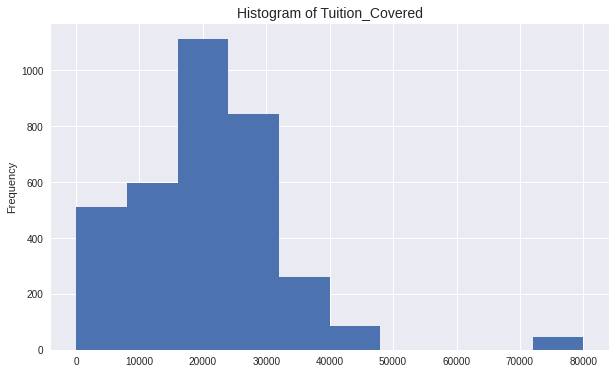

In [34]:
#Analysis of the columns with null values
#Tuition_Covered Columm

fig = plt.figure(figsize = (10,6))
data['tuition_covered'].plot(kind='hist', grid = True)
plt.title('Histogram of Tuition_Covered', fontsize = 14)
plt.show()

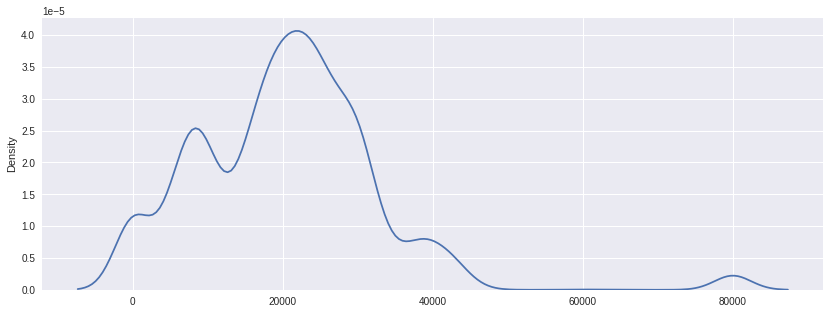

In [36]:
fig = plt.figure(figsize = (14,5))

sns.distplot(data[['tuition_covered']], hist = False)
plt.show()

In [37]:
data.columns

Index(['school_id', 'university', 'major', 'district', 'city', 'level',
       'language', 'tuition_covered', 'accomodation_covered',
       'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee',
       'start_month', 'start_year', 'accomodation_to_pay',
       'accomodation_duration', 'expense_to_pay', 'expense_duration'],
      dtype='object')

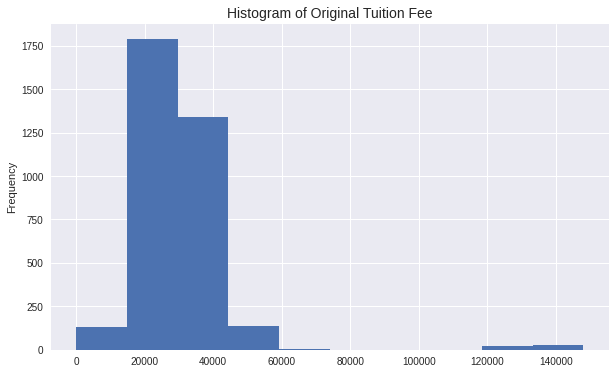

In [38]:
#Original_Tuition_Fee Columm

fig = plt.figure(figsize = (10,6))
data['original_tuition_fee'].plot(kind='hist', grid = True)
plt.title('Histogram of Original Tuition Fee', fontsize = 14)
plt.show()

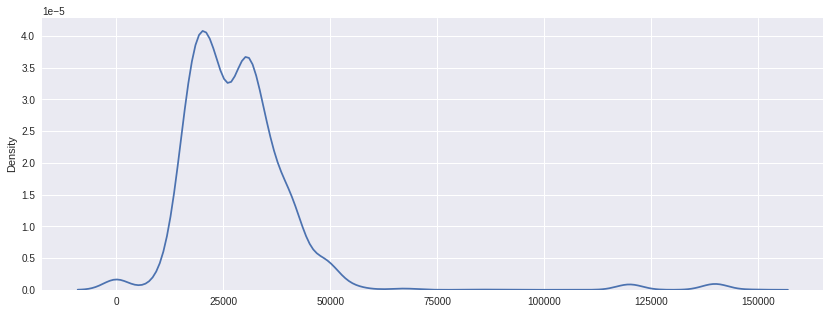

In [39]:
fig = plt.figure(figsize = (14,5))

sns.distplot(data[['original_tuition_fee']], hist = False)
plt.show()

In [40]:
#Replacing missing values in columns with mean 
median_1 = data['tuition_covered'].median()
median_2 = data['original_tuition_fee'].median()

data['tuition_covered'].replace(np.nan, median_1, inplace = True)
data['original_tuition_fee'].replace(np.nan, median_2, inplace = True)

In [41]:
data.isnull().sum()

school_id                 0
university                0
major                     0
district                  0
city                      0
level                     0
language                  0
tuition_covered           0
accomodation_covered      0
living_expense_covered    0
tuition_fees_to_pay       0
original_tuition_fee      0
start_month               0
start_year                0
accomodation_to_pay       0
accomodation_duration     0
expense_to_pay            0
expense_duration          0
dtype: int64

The columns with null values were filled with the median 

## Multicollinearity

In [42]:
#checking the correlation among the variables
corr = data.corr()
corr

,school_id,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_year,accomodation_to_pay,expense_to_pay
school_id,1.000000,0.182617,0.063655,0.301017,0.086314,0.181666,0.091116,-0.192830,-0.232701
tuition_covered,0.182617,1.000000,0.266681,0.114678,-0.045753,0.781877,0.229983,0.454282,0.097330
accomodation_covered,0.063655,0.266681,1.000000,0.539758,-0.352404,0.005809,0.339443,-0.127002,-0.313639
living_expense_covered,0.301017,0.114678,0.539758,1.000000,0.044373,0.083993,0.320642,-0.154476,-0.766834
tuition_fees_to_pay,0.086314,-0.045753,-0.352404,0.044373,1.000000,0.576242,-0.201086,0.490595,-0.077510
original_tuition_fee,0.181666,0.781877,0.005809,0.083993,0.576242,1.000000,0.064633,0.682031,0.067911
start_year,0.091116,0.229983,0.339443,0.320642,-0.201086,0.064633,1.000000,-0.076349,-0.154021
accomodation_to_pay,-0.192830,0.454282,-0.127002,-0.154476,0.490595,0.682031,-0.076349,1.000000,0.406708
expense_to_pay,-0.232701,0.097330,-0.313639,-0.766834,-0.077510,0.067911,-0.154021,0.406708,1.000000


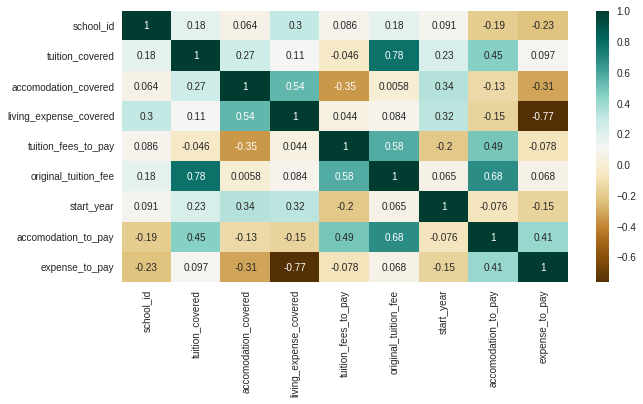

In [43]:
plt.figure(figsize = (10, 5))
sns.heatmap(corr, cmap ='BrBG', annot = True)

CONCLUSION

Original_Tuition_Fee and Tuition_Covered are highly positively correlated (0.78)

Original_Tuition_Fee and Accomodation_To_Pay are highly positively correlated (0.68)

Living_Expense_Covered? and Expense_To_Pay are highl negatively correlated (-0.77)

## Univariate Analysis

In [45]:
data['university'].value_counts()

Zhejiang Normal University                                                     402
North China Electric Power University                                          352
Shandong University                                                            240
Zhejiang University of Technology                                              222
China University of Petroleum - Beijing                                        213
Chongqing Medical University                                                   189
Shanghai University of Traditional Chinese Medicine                            171
South China University of Technology                                           145
Zhejiang University of Science and Technology                                  120
Zhengzhou University of Light Industry                                         119
Northeast Petroleum University                                                 109
Zhejiang A & F University                                                      107
Chin

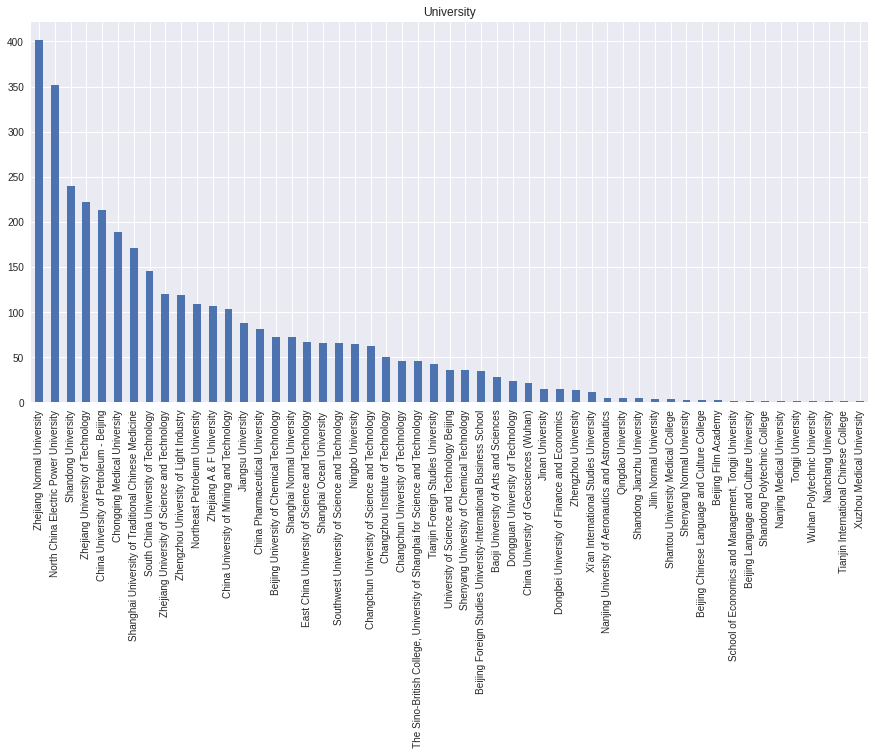

In [46]:
data['university'].value_counts().plot(kind = "bar", title = 'University', figsize=(15, 7))
plt.xticks(rotation = 90)

plt.show()

In [47]:
data['major'].value_counts()

Computer Science and Technology                      54
Mechanical Engineering                               45
Business Administration                              37
Software Engineering                                 37
Chemistry                                            29
                                                     ..
Diplomacy(Changan Campus)                             1
Chinese Language and Literature(Yanta Campus)         1
MBBS (Bachelor of Medicine & Bachelor of Surgery)     1
MBA（Master of Business Administration）                1
Synthesis of Fine Chemical and Molecular              1
Name: major, Length: 1249, dtype: int64

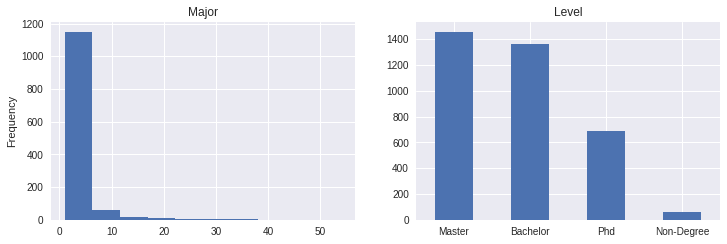

In [48]:
plt.subplot(221)
data['major'].value_counts().plot(kind = 'hist', title = 'Major', figsize = (12, 8))
plt.subplot(222)
data['level'].value_counts().plot(kind = 'bar', title = 'Level')
plt.xticks(rotation = 360)

plt.show()

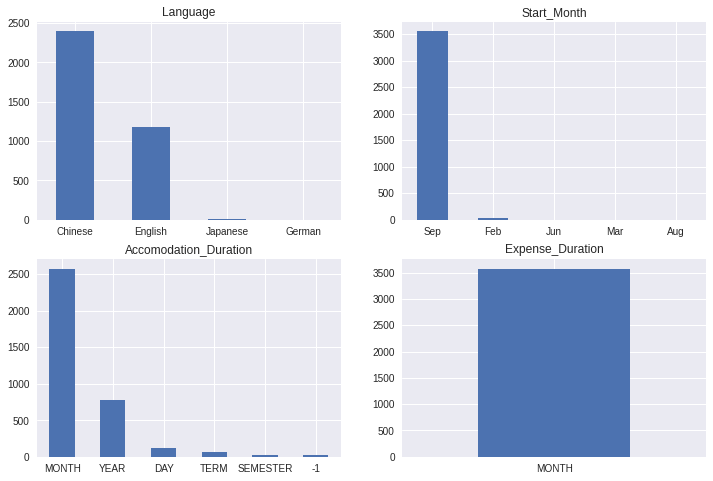

In [49]:
plt.subplot(221)
data['language'].value_counts().plot(kind = 'bar', title = 'Language', figsize=(12, 8))
plt.xticks(rotation = 360)
plt.subplot(222)
data['start_month'].value_counts().plot(kind = 'bar', title = 'Start_Month')
plt.xticks(rotation = 360)
plt.subplot(223)
data['accomodation_duration'].value_counts().plot(kind = 'bar', title = 'Accomodation_Duration')
plt.xticks(rotation = 360)
plt.subplot(224)
data['expense_duration'].value_counts().plot(kind = 'bar', title = 'Expense_Duration')
plt.xticks(rotation = 360)

plt.show()

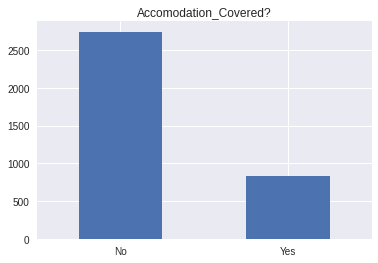

In [51]:
data['accomodation_covered'].value_counts().plot(kind = 'bar', title = 'Accomodation_Covered?')
plt.xticks([0, 1], ['No', 'Yes'], rotation = 360)

plt.show()

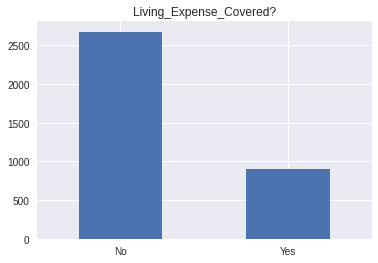

In [53]:
data['living_expense_covered'].value_counts().plot(kind = 'bar', title = 'Living_Expense_Covered?')
plt.xticks([0, 1], ['No', 'Yes'], rotation = 360)

plt.show()

CONCLUSION

Zhejiang Normal University has the highest frequency.

Most Universities give scholarships at the Master's level followed by the Bachelor's level.

The most common language is Chineese.

The start month of the scholarship is usually September while the Accomodation_Duration and Expense_Duration is usually monthly.

About 2500 Scholarships do not cover for accomodation(Accomodation_Covered?) and living expense(Living_Expense_Covered?)

Computer Science and Technology is the highest major for scholarships.


## Bivariate Analysis

([<matplotlib.axis.XTick at 0x7ff51507c410>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

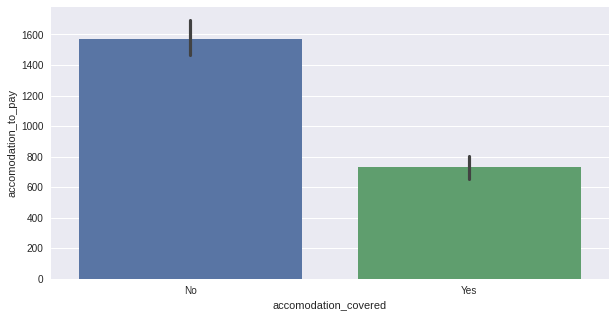

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x= 'accomodation_covered', y = 'accomodation_to_pay') 
plt.xticks([0,1], ['No', 'Yes'])

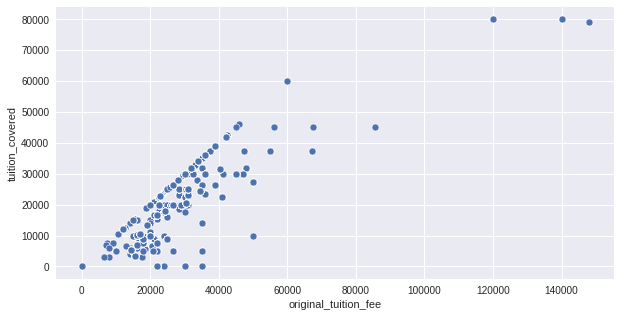

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x= 'original_tuition_fee', y = 'tuition_covered')

([<matplotlib.axis.XTick at 0x7ff518d60b10>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

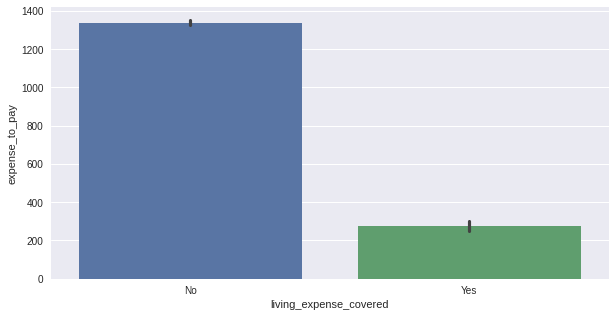

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(data =data, x = 'living_expense_covered', y ='expense_to_pay')
plt.xticks([0,1], ['No', 'Yes'])

CONCLUSION

The Tuition_Covered increases as the Original_Tuition_Fee increases.

Most Scholarships do not cover the Expense_To_Pay.

Most scholarships do no cover the Accomodation_To_Pay.

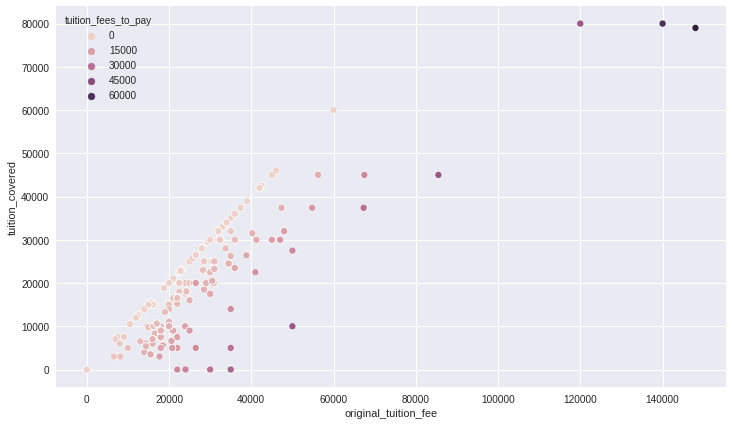

In [58]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=data, x= 'original_tuition_fee', y = 'tuition_covered', hue = 'tuition_fees_to_pay')

CONCLUSION

Tuition_Fees_To_Pay increases as Original_Tuition_Fee and Tuition_Covered increases.

# Data Preprocessing

In [59]:
# Let us view the descriptive statistics of the dataframe. Note that this can only be applied to numerical values 
data[['tuition_covered', 'tuition_fees_to_pay', 'original_tuition_fee', 'accomodation_to_pay', 'expense_to_pay']].describe().T

,count,mean,std,min,25%,50%,75%,max
tuition_covered,3576.0,20513.415828,12212.839635,0.0,12000.0,20000.0,26500.0,80000.0
tuition_fees_to_pay,3576.0,8433.516499,9519.340675,0.0,0.0,6000.0,11000.0,69000.0
original_tuition_fee,3576.0,28618.492729,15080.527382,0.0,20000.0,26500.0,33750.0,148000.0
accomodation_to_pay,3576.0,1376.461969,2802.526970,0.0,400.0,900.0,1200.0,24000.0
expense_to_pay,3576.0,1070.987136,601.297528,0.0,1000.0,1000.0,1500.0,2700.0


In [60]:
temp = data[['original_tuition_fee', 'tuition_covered', 'tuition_fees_to_pay']]
temp["check"] = data['original_tuition_fee'] - data['tuition_covered']
temp

,original_tuition_fee,tuition_covered,tuition_fees_to_pay,check
0,7500.0,7500.0,0,0.0
1,20000.0,10000.0,10000,10000.0
2,20000.0,10000.0,10000,10000.0
3,20000.0,10000.0,10000,10000.0
4,7000.0,7000.0,0,0.0
...,...,...,...,...
3571,38950.0,38950.0,0,0.0
3572,38950.0,38950.0,0,0.0
3573,38950.0,38950.0,0,0.0
3574,38950.0,38950.0,0,0.0


In [61]:
print((temp['tuition_fees_to_pay'] != temp['check']).sum())

123


In [62]:
temp[temp['tuition_fees_to_pay'] != temp['check']]

,original_tuition_fee,tuition_covered,tuition_fees_to_pay,check
883,26500.0,20000.0,15000,6500.0
1029,26500.0,20000.0,15000,6500.0
2395,26500.0,20000.0,16200,6500.0
2396,26500.0,20000.0,16200,6500.0
2397,26500.0,20000.0,16200,6500.0
...,...,...,...,...
3260,26500.0,20000.0,16200,6500.0
3261,26500.0,20000.0,16200,6500.0
3262,26500.0,20000.0,0,6500.0
3320,26500.0,20000.0,16200,6500.0


### Tuition to pay
There are only 123 instances where the difference between orignal tuition and tuition covered is not equal to tuition to pay. <br> and this number 123 corresponds to the number of missing values  for both tuition covered and original tuition. <br>
Based on the above, tuition to pay is not a good target for prediction.

In [63]:
data["accomodation_duration"].value_counts()

MONTH       2575
YEAR         774
DAY          116
TERM          59
SEMESTER      27
-1            25
Name: accomodation_duration, dtype: int64

In [64]:
newdata = data.copy()

#convert per year to per month
#newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "YEAR"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "YEAR"] / 12

#convert per day to per year using 365 days per year
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "DAY"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "DAY"] * 365

#convert per term to per year using 3 terms in a year
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "TERM"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "TERM"] * 2

#convert per semester to per year using 2 semesters per year
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "SEMESTER"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "SEMESTER"] * 2

newdata.sample(5)

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
2752,2782,Zhejiang University of Technology,Geotechnical Engineering,Xihu,Zhejiang,Master,Chinese,30000.0,0,0,2400,32400.0,Sep,2019,1500,MONTH,1000,MONTH
519,549,South China University of Technology,Intelligence Science and Technology,Tianhe,Guangdong,Bachelor,Chinese,17550.0,0,0,6500,24050.0,Sep,2019,1000,MONTH,1000,MONTH
493,523,Shenyang University of Chemical Technology,Mechanical Design Manufacturing and Automation,Tiexi,Liaoning,Bachelor,Chinese,15500.0,1,0,0,15500.0,Sep,2019,4000,YEAR,1500,MONTH
2550,2580,Shanghai University of Traditional Chinese Med...,Chinese Materia Medica(RESEARCH ON SUBSTANCE F...,Xuhui,Shanghai,Master,English,29500.0,1,1,0,29500.0,Sep,2020,1000,MONTH,1000,MONTH
3307,3337,Chongqing Medical University,Emergency Medicine,Yuzhong,Chongqing,Phd,Chinese,27500.0,0,0,22500,50000.0,Sep,2019,400,MONTH,1000,MONTH


In [65]:
temp2 = data[['living_expense_covered', 'expense_to_pay', "expense_duration"]]
temp2

,living_expense_covered,expense_to_pay,expense_duration
0,0,1000,MONTH
1,0,1500,MONTH
2,0,1500,MONTH
3,0,1500,MONTH
4,1,0,MONTH
...,...,...,...
3571,1,0,MONTH
3572,1,0,MONTH
3573,1,0,MONTH
3574,1,0,MONTH


In [66]:
data["expense_duration"].value_counts()

MONTH    3576
Name: expense_duration, dtype: int64

MONTH    3576
Name: expense_duration, dtype: int64

### Accomodation to pay
Accomodation to pay is always zero when accomodation is covered.

### Expense to pay
Expense to pay is zero when living expenses are covered. <br>
Drop expense_duration as it is always per month, there's nothing to learn from it.

In [68]:
#Create total expense to pay, sum of tuition to pay, accomodation to pay and expense to pay.
newdata["total_expense"] = newdata[["tuition_fees_to_pay", "accomodation_to_pay", "expense_to_pay"]].sum(axis=1)
newdata.sample(5)

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration,total_expense
1507,1537,Baoji University of Arts and Sciences,Geographical Science,Baoji,Shaanxi,Master,English,12000.0,1,1,0,12000.0,Sep,2019,0,YEAR,0,MONTH,0
3497,3527,China University of Mining and Technology,Computational Mathematics,Xuzhou,Jiangsu,Phd,Chinese,10625.0,0,0,6375,17000.0,Sep,2019,3000,YEAR,2000,MONTH,11375
2743,2773,Zhejiang University of Technology,Software Engineering,Xihu,Zhejiang,Master,English,30000.0,0,0,2400,32400.0,Sep,2019,1500,MONTH,1000,MONTH,4900
1752,1782,South China University of Technology,Legal Theory,Tianhe,Guangdong,Master,Chinese,28000.0,0,0,5750,33750.0,Sep,2019,1000,MONTH,1000,MONTH,7750
314,344,Zhejiang Normal University,Business Administration,Wucheng,Zhejiang,Bachelor,English,16800.0,0,0,5200,22000.0,Sep,2019,500,MONTH,1500,MONTH,7200


In [69]:
newdata.columns

Index(['school_id', 'university', 'major', 'district', 'city', 'level',
       'language', 'tuition_covered', 'accomodation_covered',
       'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee',
       'start_month', 'start_year', 'accomodation_to_pay',
       'accomodation_duration', 'expense_to_pay', 'expense_duration',
       'total_expense'],
      dtype='object')

In [70]:
#remove redundant columns
redund_cols = ['tuition_fees_to_pay', 'original_tuition_fee',
               'accomodation_to_pay', 'tuition_covered',
               'accomodation_duration', 'expense_to_pay', 'expense_duration',
              "school_id", "major", "city"] #'tuition_covered', add/remove tuition covered to/from the features
newdata = newdata.drop(columns=redund_cols)

In [71]:
newdata

,university,district,level,language,accomodation_covered,living_expense_covered,start_month,start_year,total_expense
0,Shanghai University of Traditional Chinese Med...,Xuhui,Non-Degree,English,0,0,Jun,2020,10750
1,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000
2,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000
3,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000
4,Qingdao University,Qingdao,Non-Degree,Chinese,1,1,Sep,2019,0
...,...,...,...,...,...,...,...,...,...
3571,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0
3572,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0
3573,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0
3574,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0


### Inspect columns in new data

In [72]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   university              3576 non-null   object
 1   district                3576 non-null   object
 2   level                   3576 non-null   object
 3   language                3576 non-null   object
 4   accomodation_covered    3576 non-null   int64 
 5   living_expense_covered  3576 non-null   int64 
 6   start_month             3576 non-null   object
 7   start_year              3576 non-null   int64 
 8   total_expense           3576 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 251.6+ KB


In [73]:
newdata["district"].nunique()

40

In [74]:
newdata["district"].unique()

array(['Xuhui', 'Chaoyang ', 'Qingdao', 'Zhongyuan', 'Xicheng Qu',
       'Jiangbei ', 'Shinan', 'Changping', 'Haidian', "Lin'an", 'Nankai',
       'Nanchang', 'Xinbei', "Chang'an", 'Wuhan', 'Licheng', 'Wucheng',
       'Chaoyang', 'Fuchen', 'Tiexi', 'Dongxihu', 'Tianhe', 'Zhenjiang',
       'Xihu', 'Shahekou', 'Yangpu', 'Longfeng', 'Yunlong', 'Huanggu',
       'Xuzhou', 'Nanjing', 'Hexi', 'Siping', ' Fengxian', 'Jinping',
       'Dongguan', 'Yuzhong', 'Baoji', 'Licheng District',
       'Xuhui District'], dtype=object)

In [75]:
newdata = newdata.replace("Licheng District", "Licheng")
newdata = newdata.replace("Xuhui District", "Xuhui")

In [76]:
newdata["district"].nunique()

38

There are 38 unique disricts, we could predict total expense based on district.

In [77]:
newdata["level"].unique()

array(['Non-Degree', 'Bachelor', 'Master', 'Phd'], dtype=object)

In [78]:
newdata["university"].nunique()

53

In [79]:
newdata["language"].unique()

array(['English', 'Chinese', 'Japanese', 'German'], dtype=object)

In [80]:
newdata["start_month"].nunique()

5

In [81]:
newdata["start_year"].nunique()

2

## Modelling

In [82]:
# Let us define the predictor columns and the target column 
# X is the predictor
# y is the target variable
X = newdata.drop(['total_expense'], axis = 1)
y = newdata['total_expense']

In [83]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols = list(X.select_dtypes(include = 'object').columns)
num_cols = list(X.select_dtypes(exclude = 'object').columns)
print(obj_cols)
print(num_cols)

['university', 'district', 'level', 'language', 'start_month']
['accomodation_covered', 'living_expense_covered', 'start_year']


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   university              3576 non-null   object
 1   district                3576 non-null   object
 2   level                   3576 non-null   object
 3   language                3576 non-null   object
 4   accomodation_covered    3576 non-null   int64 
 5   living_expense_covered  3576 non-null   int64 
 6   start_month             3576 non-null   object
 7   start_year              3576 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 223.6+ KB


In [85]:
#Split into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.3,
                                                    random_state=42)

print(f"Train size: \nxtrain: {X_train.shape}\nytrain: {y_train.shape}",
      f"\n\nTest size: \nxtest: {X_test.shape}\nytest: {y_test.shape}")

Train size: 
xtrain: (2503, 8)
ytrain: (2503,) 

Test size: 
xtest: (1073, 8)
ytest: (1073,)


In [86]:
# Preprocessing for numerical data
#data is filled with the mean value
#data is scaled with MinMaxScaler
numerical_transformer = Pipeline(steps=[("impute", SimpleImputer(strategy="mean")), 
                                        ('scale', MinMaxScaler())])

# Preprocessing for categorical data
#data is encoded with OrdinalEncoder
#data is scaled with MinMaxScaler
categorical_transformer = Pipeline(steps=[
    ('label_enc', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=100)), ('scale', MinMaxScaler())])  
#Changed to Ordinal Encoder to reduce dimensions

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, obj_cols)])

### Random Forest

In [87]:
model = RandomForestRegressor()

# Bundle preprocessing and modeling code in a pipeline
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model) ])

scores = cross_val_score(rf_clf, X_train, y_train, cv=5,
                        scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print(scores.mean())

MAE scores:
 [ -931.1729949  -1011.78464159 -1320.36938546  -932.28402963
  -781.53770207]
-995.4297507304152


In [88]:
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.932504122222901

In [89]:
def rf_score(params):
    model = RandomForestRegressor(n_jobs=-1, **params)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
    mae = -1 * cross_val_score(pipe, X_train, y_train, cv=5,
                        scoring='neg_mean_absolute_error').mean()
    return mae


def rf_objective(trial):
    params = {
                "criterion" : trial.suggest_categorical("criterion", ["mse", "mae"]),
                "n_estimators" : trial.suggest_int('n_estimators', 1, 1000),
                'max_depth':trial.suggest_int('max_depth', 1, 7),
             }
    return(rf_score(params))


def print_best_callback(study, trial):
    print(f"Best value: {study.best_value}")

In [90]:
optuna.logging.set_verbosity(0)
rf_study = optuna.create_study(direction='minimize',sampler=TPESampler())
rf_study.optimize(rf_objective, n_trials= 20, show_progress_bar = True, callbacks=[print_best_callback])
rf_best = rf_study.best_params
rf_best

  0%|          | 0/20 [00:00<?, ?it/s]

Best value: 5843.01432322174
Best value: 5843.01432322174
Best value: 5096.011846073478
Best value: 2682.7208786138026
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039
Best value: 1589.359787027039


{'criterion': 'mae', 'max_depth': 7, 'n_estimators': 366}

In [91]:
#tuned model
rf_model = RandomForestRegressor(**rf_best)

#retrain with full data
rf_tuned_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', rf_model)])
rf_tuned_clf.fit(X_train, y_train)
rf_tuned_clf.score(X_test, y_test)

0.9073874363764509

### XGBoost

In [92]:
model = XGBRegressor()

# Bundle preprocessing and modeling code in a pipeline
xg_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model) ])

scores = cross_val_score(xg_clf, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print(scores.mean())

[15:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE scores:
 [-2390.82574573 -2448.23041929 -2741.82701418 -2174.71176932
 -2287.61963834]
-2408.6429173704105


In [93]:
xg_clf.fit(X_train, y_train)
xg_clf.score(X_test, y_test)

[15:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9070982948947119

### Tuning

In [94]:
def xg_score(params):
    model = XGBRegressor( **params)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
    mae = -1 * cross_val_score(pipe, X_train, y_train, cv=5,
                        scoring='neg_mean_absolute_error').mean()
    return mae


def xg_objective(trial):
    params = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 3, 5),
                'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
                'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
                'min_child_weight':trial.suggest_int('min_child_weight',0,5),
                'gamma':trial.suggest_uniform('gamma', 0, 4),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.05,0.5),
                'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.4,0.9),
                'subsample':trial.suggest_uniform('subsample',0.4,0.9),
                'nthread' : -1
            }
    return(xg_score(params))


def print_best_callback(study, trial):
    print(f"Best value: {study.best_value}")

In [95]:
optuna.logging.set_verbosity(0)
xg_study = optuna.create_study(direction='minimize',sampler=TPESampler())
xg_study.optimize(xg_objective, n_trials= 50, show_progress_bar = True, callbacks=[print_best_callback])
xg_best = xg_study.best_params
xg_best

  0%|          | 0/50 [00:00<?, ?it/s]

[15:57:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best value: 1403.4392138360456
[15:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

{'colsample_bytree': 0.766812424639463,
 'gamma': 3.7281756084369224,
 'learning_rate': 0.40970552399423077,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 479,
 'reg_alpha': 5.6129056597380025,
 'reg_lambda': 1.1180960605812764,
 'subsample': 0.8648838580931659}

In [96]:
#tuned model
xg_model = XGBRegressor(**xg_best)

#retrain with full data
xg_tuned_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', xg_model)])
xg_tuned_clf.fit(X_train, y_train)
xg_tuned_clf.score(X_test, y_test)

[16:00:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9287096533905173

### Results Analysis

In [97]:
def show_results(actual, pred):
    rsquared = r2_score(actual, pred)
    mae = mean_absolute_error(actual, pred)
    rmse = mean_squared_error(actual, pred, squared=False)
    return pd.DataFrame([rsquared, mae, rmse], index=["$R^2$", "MAE", "RMSE"])

In [98]:
#RF
rf_base_pred = rf_clf.predict(X_test)
rf_tuned_pred = rf_tuned_clf.predict(X_test)

#XG
xg_base_pred = xg_clf.predict(X_test)
xg_tuned_pred = xg_tuned_clf.predict(X_test)

In [99]:
temp = pd.DataFrame()
temp["rf_base"] = show_results(y_test, rf_base_pred)
temp["rf_tuned"] = show_results(y_test, rf_tuned_pred)
temp["xg_base"] = show_results(y_test, xg_base_pred)
temp["xg_tuned"] = show_results(y_test, xg_tuned_pred)
temp.round(4)

,rf_base,rf_tuned,xg_base,xg_tuned
$R^2$,0.9325,0.9074,0.9071,0.9287
MAE,985.4608,1594.6024,2254.2145,1022.0877
RMSE,2893.8126,3389.7427,3395.0300,2974.0423


In [100]:
#compare predictions to actual data
temp = pd.DataFrame()
temp["b_rf_pred"] = rf_clf.predict(X_test)
temp["b_xg_pred"] = xg_clf.predict(X_test)
temp["actual"] = y_test.values
temp["rf_pred"] = rf_tuned_clf.predict(X_test)
temp["xg_pred"] = xg_tuned_clf.predict(X_test)
temp.round(3)

,b_rf_pred,b_xg_pred,actual,rf_pred,xg_pred
0,2700.000,7992.915039,2700,2813.934,1959.696045
1,13000.000,10365.029297,13000,11629.932,12943.867188
2,9200.000,9299.228516,9200,9052.131,9354.661133
3,8500.000,8730.935547,8500,7968.770,8443.152344
4,20065.539,15938.090820,3620,12068.525,20471.695312
...,...,...,...,...,...
1068,8900.749,8328.272461,7200,7959.549,8934.851562
1069,13000.000,10365.029297,13000,11629.932,12993.083008
1070,13600.000,10700.594727,13600,12872.678,13383.647461
1071,3670.089,6660.996094,2100,6191.414,3672.756104
